will enhance any frame-protected, light-damaged photos, i.e. pictures where the border represents the undamaged original

final image should be an enhanced version of the original

user interface: should read in and output a single image

start 'Faded.jpg' first and then 'Damaged.jpg'

Convert appropriate colourspace to exaggerate the difference between damaged and undamaged

Work on the damaged and undamaged areas separate

Enhance the images to increase contrast and definition

Test by viewing image histograms, look for changes across rows and columns 

In [1]:
import cv2
import numpy as np
import easygui
from matplotlib import pyplot as plt

# First Problem

* Line detection algorithm to detect boxes of faded.jpg 
* Using Hough Transform function 
* Cropped the image and subtract the lowest pixel values between them

In [23]:
# I = cv2.imread("Faded.jpg")  
# Open a user-selected image
f = easygui.fileopenbox()
first_img = cv2.imread(f)
copy = first_img.copy()

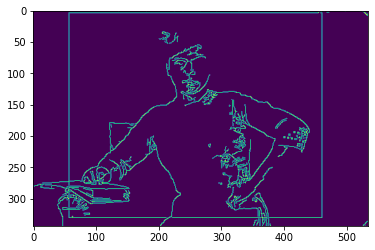

In [24]:
# Change original image to grayscale 
gray = cv2.cvtColor(first_img, cv2.COLOR_BGR2GRAY)
canny = cv2.Canny(gray, 50, 150, apertureSize = 3, L2gradient=True)
#plt.imshow(first_img)
plt.imshow(canny)

In [25]:
lines = cv2.HoughLinesP(canny, 1, np.pi/180, 200, minLineLength=250,maxLineGap=5)

In [26]:
for i in lines[0]:
    pt1 = (i[0], i[1])
    pt2 = (i[2], i[3])
    cv2.line(first_img, pt1, pt2, (0,0,255), 2)

In [27]:
# crop the image to subtract images
print(lines.ravel())
list = lines.ravel()
# 57, 330 - left bottom x,y
# 461, 330 - right bottom x,y
# 57, 4 - left top x,y
# 461, 4 - right top x,y
x1 = list[0] # 57
x2 = list[2] # 461
y1 = list[1] # 4
y2 = list[5] # 330
cropped = first_img[y1:y2, x1:x2]


[ 57   4 461   4  57 330 461 330  57 329  57   0 461 329 461   0]


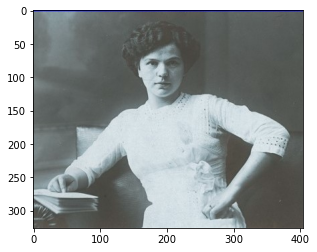

In [28]:
plt.imshow(cropped)

In [29]:
print(copy.shape)
HSV = cv2.cvtColor(copy, cv2.COLOR_BGR2HSV)
(h, s, v) = cv2.split(HSV)
    
# iterate pixels and count it
pixels = {}
for i in v:
    for pixel in i:
        if str(pixel) in pixels.keys():
            pixels[str(pixel)] += 1
        else: 
            pixels[str(pixel)] = 0
    
# Find the smallest pixel
smallPixel = None
for pixelVal in pixels.keys():
    count = int(pixels[pixelVal])
        
    if smallPixel == None and count >= 100:
        smallPixel = int(pixelVal)
        
    if smallPixel != None and smallPixel > int(pixelVal) and count >= 100:
        smallPixel = int(pixelVal)
        
# print(smallPixel)
original_pixel = smallPixel -1

(344, 535, 3)


In [30]:
print(cropped.shape)
HSV = cv2.cvtColor(cropped, cv2.COLOR_BGR2HSV)
(h, s, v) = cv2.split(HSV)
    
# iterate pixels and count it
pixels = {}
for i in v:
    for pixel in i:
        if str(pixel) in pixels.keys():
            pixels[str(pixel)] += 1
        else: 
            pixels[str(pixel)] = 0
    
# Find the smallest pixel
smallPixel = None
for pixelVal in pixels.keys():
    count = int(pixels[pixelVal])
        
    if smallPixel == None and count >= 100:
        smallPixel = int(pixelVal)
        
    if smallPixel != None and smallPixel > int(pixelVal) and count >= 100:
        smallPixel =  int(pixelVal)
        
# print(smallPixel)
cropped_pixel = smallPixel + 1

(326, 404, 3)


In [31]:
pixel = cropped_pixel - original_pixel
print(pixel)

30


In [32]:
answer = gray.copy()
answer[y1:y2, x1:x2] = gray[y1:y2, x1:x2] - pixel

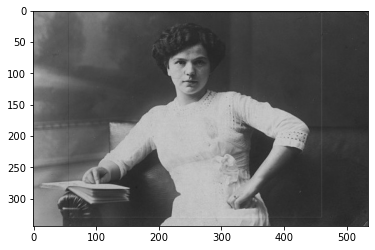

In [33]:
answer = cv2.cvtColor(answer, cv2.COLOR_GRAY2BGR)
plt.imshow(answer)

# Second Problem

* Find the saturation value and make it null value
* Using Gaussian blur filter
* Denoise and sharpening image

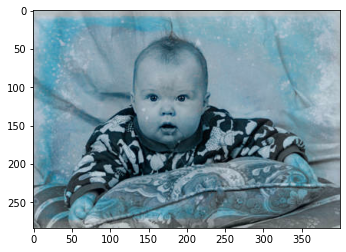

In [16]:
#second_img = cv2.imread("Damaged.jpg")
f = easygui.fileopenbox()
second_img = cv2.imread(f)
plt.imshow(second_img)
copy_img = second_img.copy()

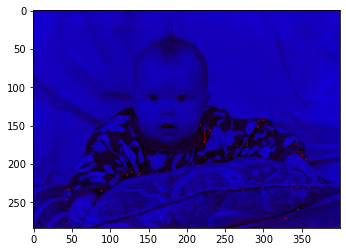

In [17]:
# remove yellow lines in image
hsv = cv2.cvtColor(second_img, cv2.COLOR_BGR2HSV)
(h,s,v) = cv2.split(hsv)
s = np.clip(s,0,0)
hsv = cv2.merge([h,s,v])
plt.imshow(hsv)

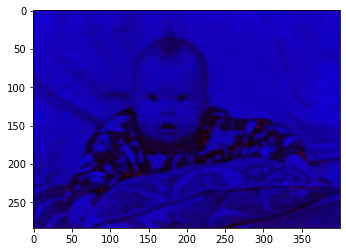

In [18]:
blurred = cv2.GaussianBlur(hsv, (5,5), 0)
plt.imshow(blurred)

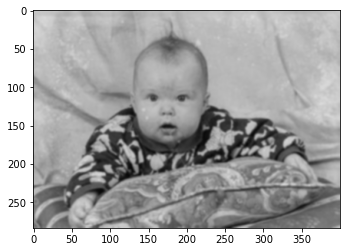

In [19]:
#mask = cv2.bitwise_and(second_img, second_img, mask=threshInv)
mask = cv2.cvtColor(blurred, cv2.COLOR_HSV2RGB)
plt.imshow(mask)

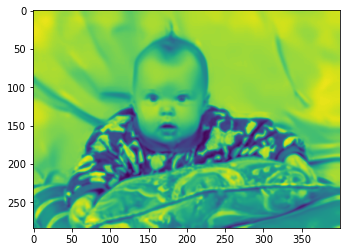

In [20]:
# denoise image 
result = cv2.cvtColor(mask, cv2.COLOR_RGB2GRAY)
temp = cv2.fastNlMeansDenoising(result, None, 7, 17)
plt.imshow(temp)

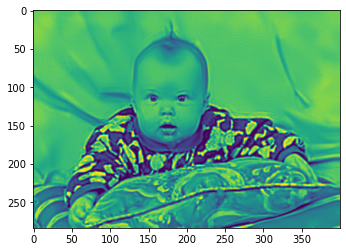

In [21]:
# sharpening image
kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
temp = cv2.filter2D(temp, -1, kernel)
plt.imshow(temp)

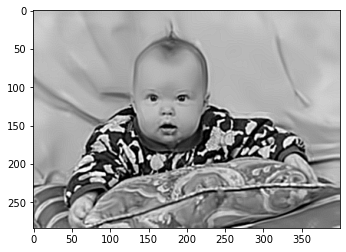

In [22]:
# convert colour and get the result
fix_image = cv2.cvtColor(temp, cv2.COLOR_GRAY2BGR)
plt.imshow(fix_image)

In [37]:
# Test Images by histogram
G = cv2.cvtColor(first_img, cv2.COLOR_BGR2GRAY) # faded.jpg
G1 = cv2.cvtColor(answer, cv2.COLOR_BGR2GRAY)  # answer for faded.jpg
G2 = cv2.cvtColor(second_img, cv2.COLOR_BGR2GRAY)  # damaged.jpg
G3 = cv2.cvtColor(fix_image, cv2.COLOR_BGR2GRAY)  # answer for damaged.jpg

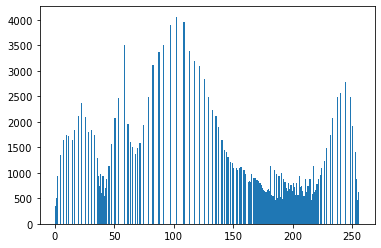

In [38]:
# Faded.jpg
H = cv2.equalizeHist(G)
values = H.ravel()
plt.hist(values, bins=256, range=[0,256])
plt.show()

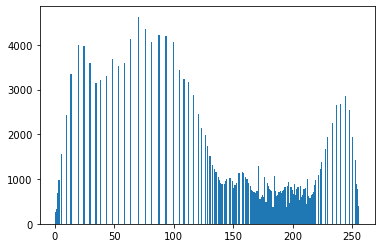

In [39]:
# Fixed Faded.jpg
H1 = cv2.equalizeHist(G1)
values = H1.ravel()
plt.hist(values, bins=256, range=[0,256])
plt.show()

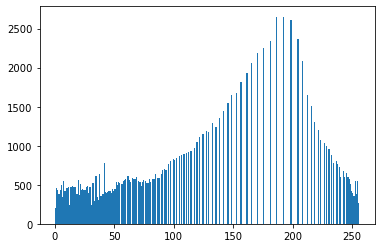

In [40]:
# Damaged.jpg
H2 = cv2.equalizeHist(G2)
values = H2.ravel()
plt.hist(values, bins=256, range=[0,256])
plt.show()

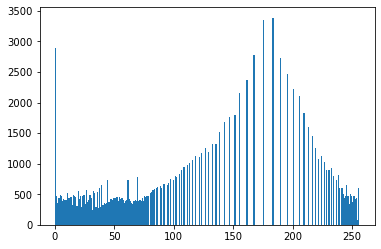

In [41]:
H3 = cv2.equalizeHist(G3)
values = H3.ravel()
plt.hist(values, bins=256, range=[0,256])
plt.show()